In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the dataset
df = pd.read_csv("C:\\Users\\user\\Desktop\\EDA\\WHR2023.csv")
df.head(10)

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
5,Sweden,7.395,0.037,7.468,7.322,10.883,0.939,72.150,0.948,0.165,0.202,1.778,1.921,1.510,0.562,0.754,0.225,0.520,1.903
6,Norway,7.315,0.044,7.402,7.229,11.088,0.943,71.500,0.947,0.141,0.283,1.778,1.994,1.521,0.544,0.752,0.212,0.463,1.829
7,Switzerland,7.240,0.043,7.324,7.156,11.164,0.920,72.900,0.891,0.027,0.266,1.778,2.022,1.463,0.582,0.678,0.151,0.475,1.870
8,Luxembourg,7.228,0.069,7.363,7.093,11.660,0.879,71.675,0.915,0.024,0.345,1.778,2.200,1.357,0.549,0.710,0.149,0.418,1.845
9,New Zealand,7.123,0.038,7.198,7.048,10.662,0.952,70.350,0.887,0.175,0.271,1.778,1.842,1.544,0.513,0.672,0.230,0.471,1.852


In [3]:
df.shape

(137, 19)

In [4]:
df_columns = ['Country name','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']

In [5]:
data = df[df_columns].copy()

In [6]:
data.head()

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379


In [7]:
#Checking for the null values
data.isnull().sum()

Country name                    0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         1
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [8]:
data.fillna(value = data['Healthy life expectancy'].mean(),inplace=True)

In [9]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize'] =(10,7)
plt.rcParams['figure.facecolor'] = '#F7D560'

Text(0, 0.5, 'GDP per capita')

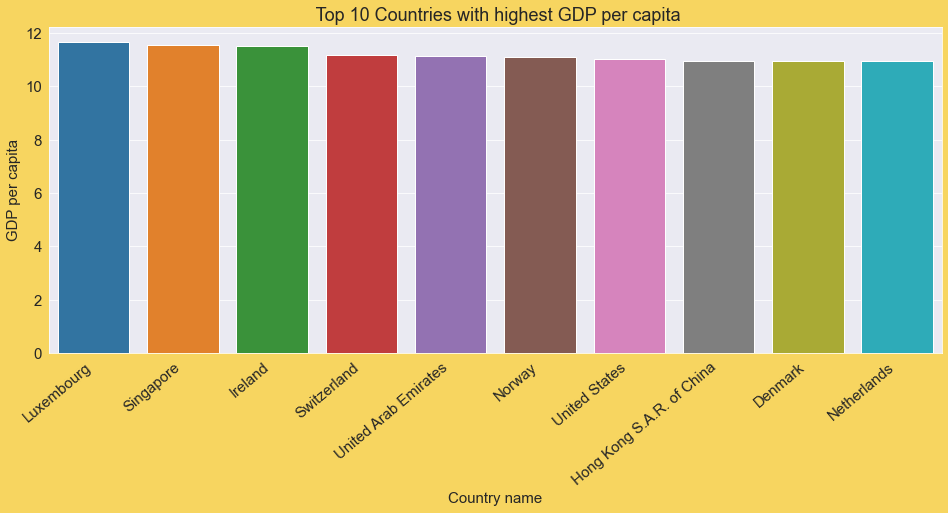

In [10]:
plt.figure(figsize=(16,6))
plt.title(" Top 10 Countries with highest GDP per capita")
plt.xticks(rotation=40,ha='right')
sns.barplot(x='Country name', y='Logged GDP per capita',data=df.sort_values('Logged GDP per capita', ascending=False).iloc[:10])
plt.ylabel("GDP per capita")

<AxesSubplot:title={'center':' Top 10 Countries with highest social support'}, xlabel='Country name', ylabel='Social support'>

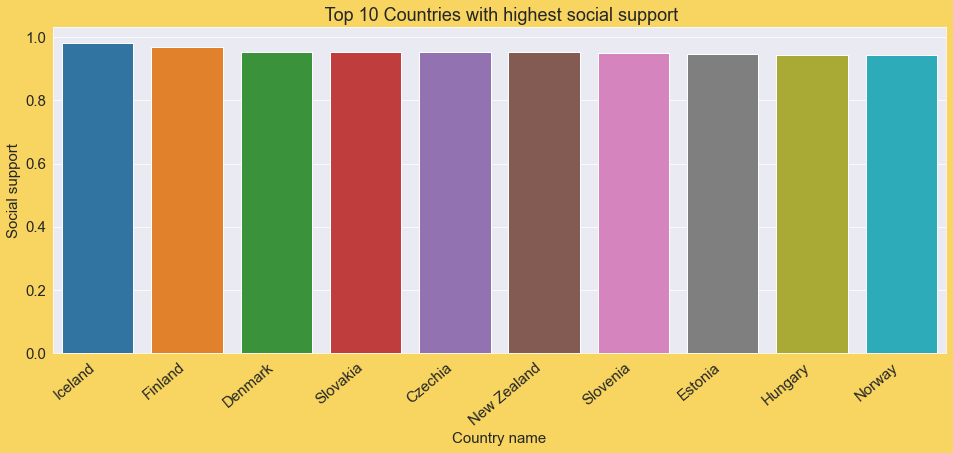

In [11]:
plt.figure(figsize=(16,6))
plt.title(" Top 10 Countries with highest social support")
plt.xticks(rotation=40,ha='right')
sns.barplot(x='Country name', y='Social support',data=df.sort_values('Social support', ascending=False).iloc[:10])


<AxesSubplot:title={'center':' Countries with most Perceptions of Corruption'}, xlabel='Country name', ylabel='Perceptions of corruption'>

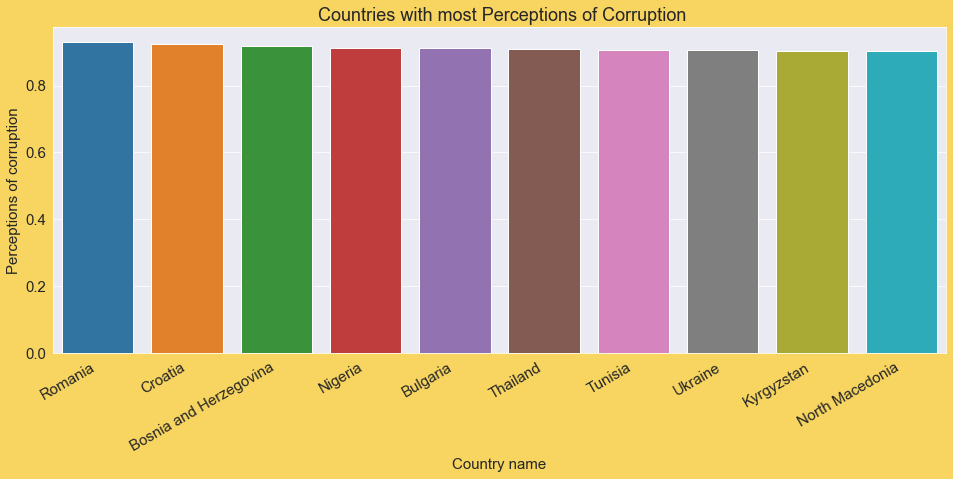

In [12]:
plt.figure(figsize=(16,6))
plt.title(" Countries with most Perceptions of Corruption")
plt.xticks(rotation=30,ha='right')
sns.barplot(x='Country name', y='Perceptions of corruption',data=df.sort_values('Perceptions of corruption', ascending=False).iloc[:10])

<AxesSubplot:title={'center':'Top 10 Countries with lowest Perceptions of Corruption'}, xlabel='Country name', ylabel='Perceptions of corruption'>

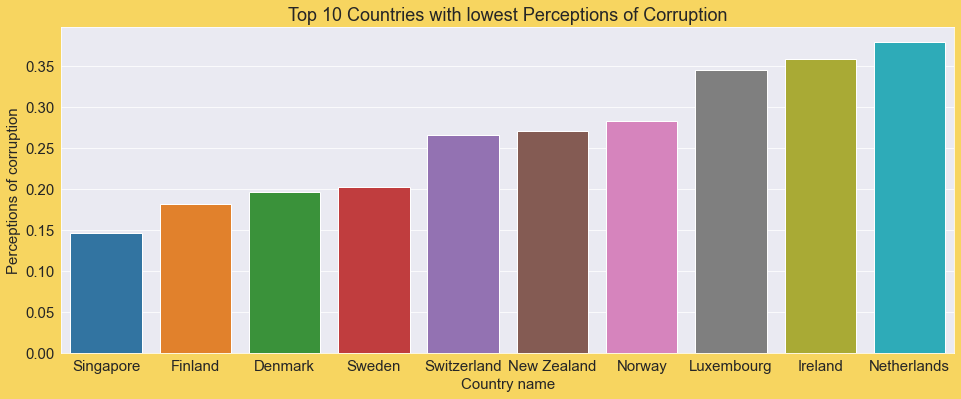

In [13]:
plt.figure(figsize=(16,6))
plt.title("Top 10 Countries with lowest Perceptions of Corruption")
sns.barplot(x='Country name', y='Perceptions of corruption',data=df.sort_values('Perceptions of corruption', ascending=True).iloc[:10])

<AxesSubplot:title={'center':'Top 10 Happiest Countries Healthy Life Expectancy'}, xlabel='Country name', ylabel='Healthy life expectancy'>

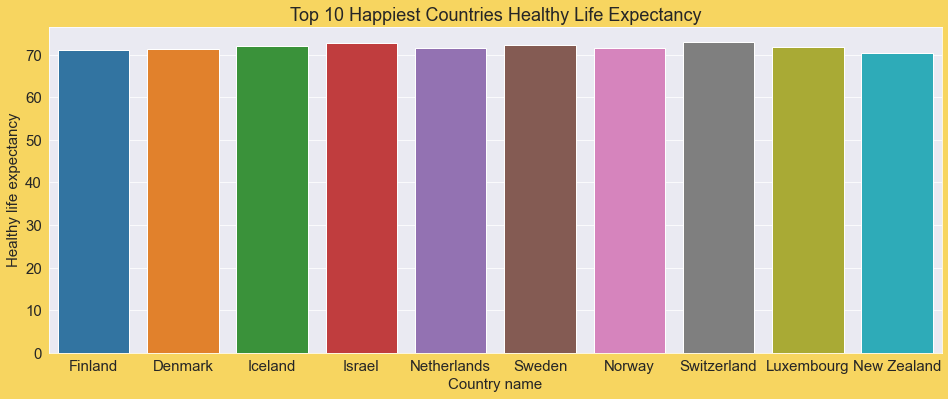

In [14]:
plt.figure(figsize=(16,6))
plt.title("Top 10 Happiest Countries Healthy Life Expectancy")
sns.barplot(x='Country name', y='Healthy life expectancy',data=df.sort_values('Ladder score', ascending=False).iloc[:10])

<AxesSubplot:title={'center':'Bottom 10 least happy Countries Healthy Life Expectancy'}, xlabel='Country name', ylabel='Healthy life expectancy'>

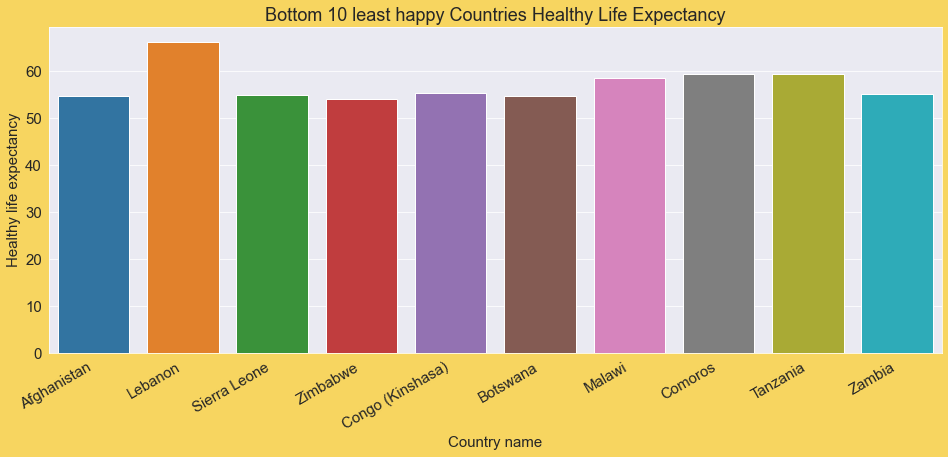

In [15]:
plt.figure(figsize=(16,6))
plt.title("Bottom 10 least happy Countries Healthy Life Expectancy")
plt.xticks(rotation=30,ha='right')
sns.barplot(x='Country name', y='Healthy life expectancy',data=df.sort_values('Ladder score', ascending=True).iloc[:10])


<AxesSubplot:title={'center':'Top 10 Most Generous Countries'}, xlabel='Country name', ylabel='Generosity'>

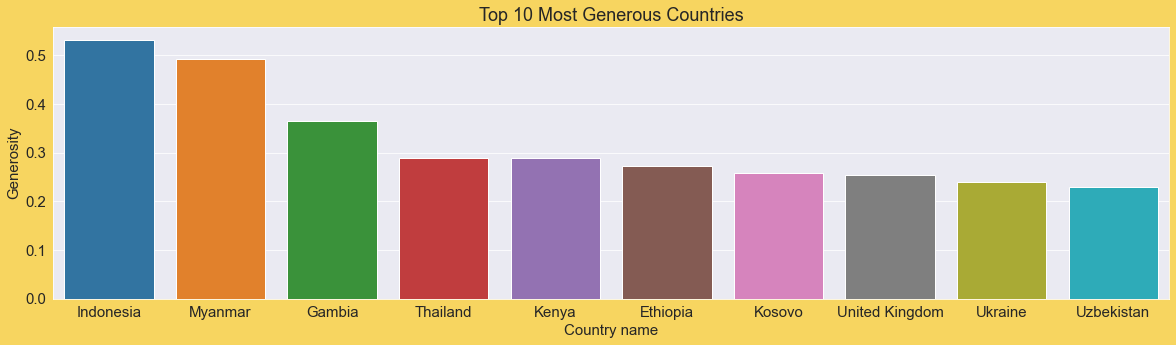

In [16]:
plt.figure(figsize=(20,5))
plt.title('Top 10 Most Generous Countries')
sns.barplot(x='Country name', y='Generosity',data=df.sort_values('Generosity', ascending=False).iloc[:10])

Text(0, 0.5, 'GDP per Capita')

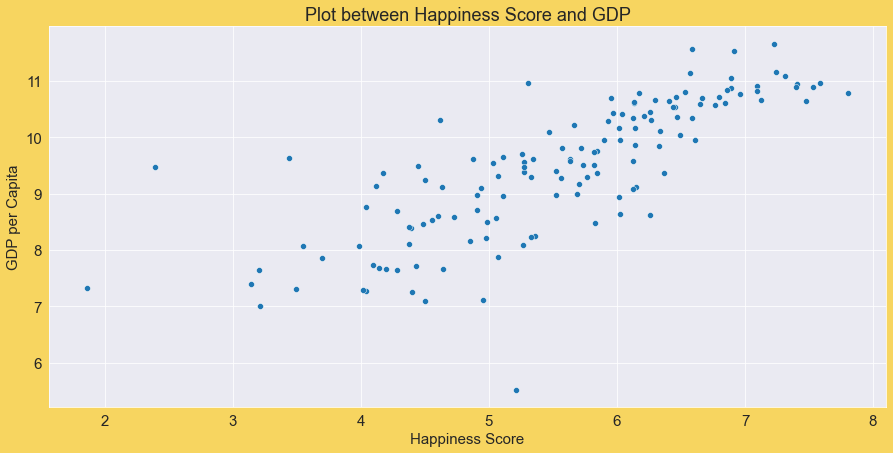

In [17]:
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x=data['Ladder score'], y= data['Logged GDP per capita'])
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')

Text(0, 0.5, 'Healthy life expectancy')

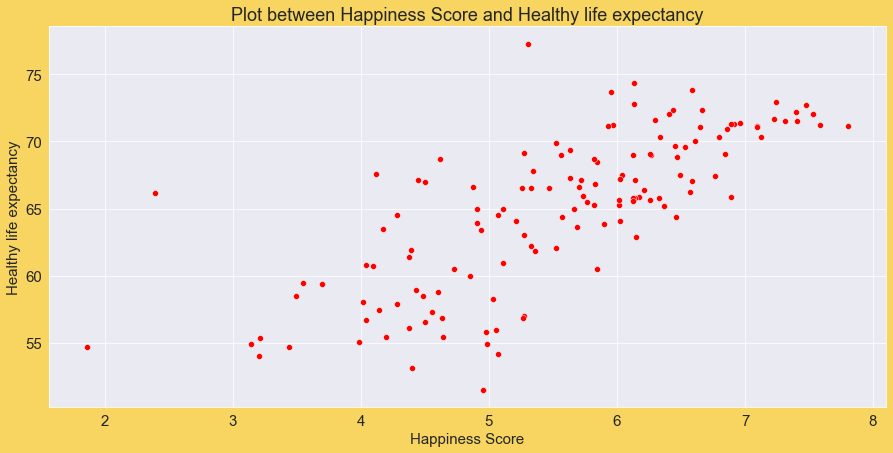

In [18]:
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Happiness Score and Healthy life expectancy')
sns.scatterplot(x=data['Ladder score'], y= data['Healthy life expectancy'], color = 'red')
plt.xlabel('Happiness Score')
plt.ylabel('Healthy life expectancy')

C:\Users\user\AppData\Local\Temp\ipykernel_20396\739346451.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),cmap="Blues",square=True,ax=ax)


<AxesSubplot:>

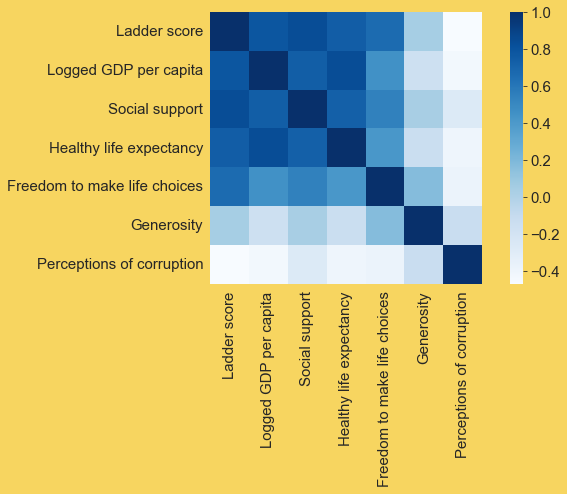

In [19]:
#Correlation Map
cor = data.corr(method = "pearson")
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),cmap="Blues",square=True,ax=ax)

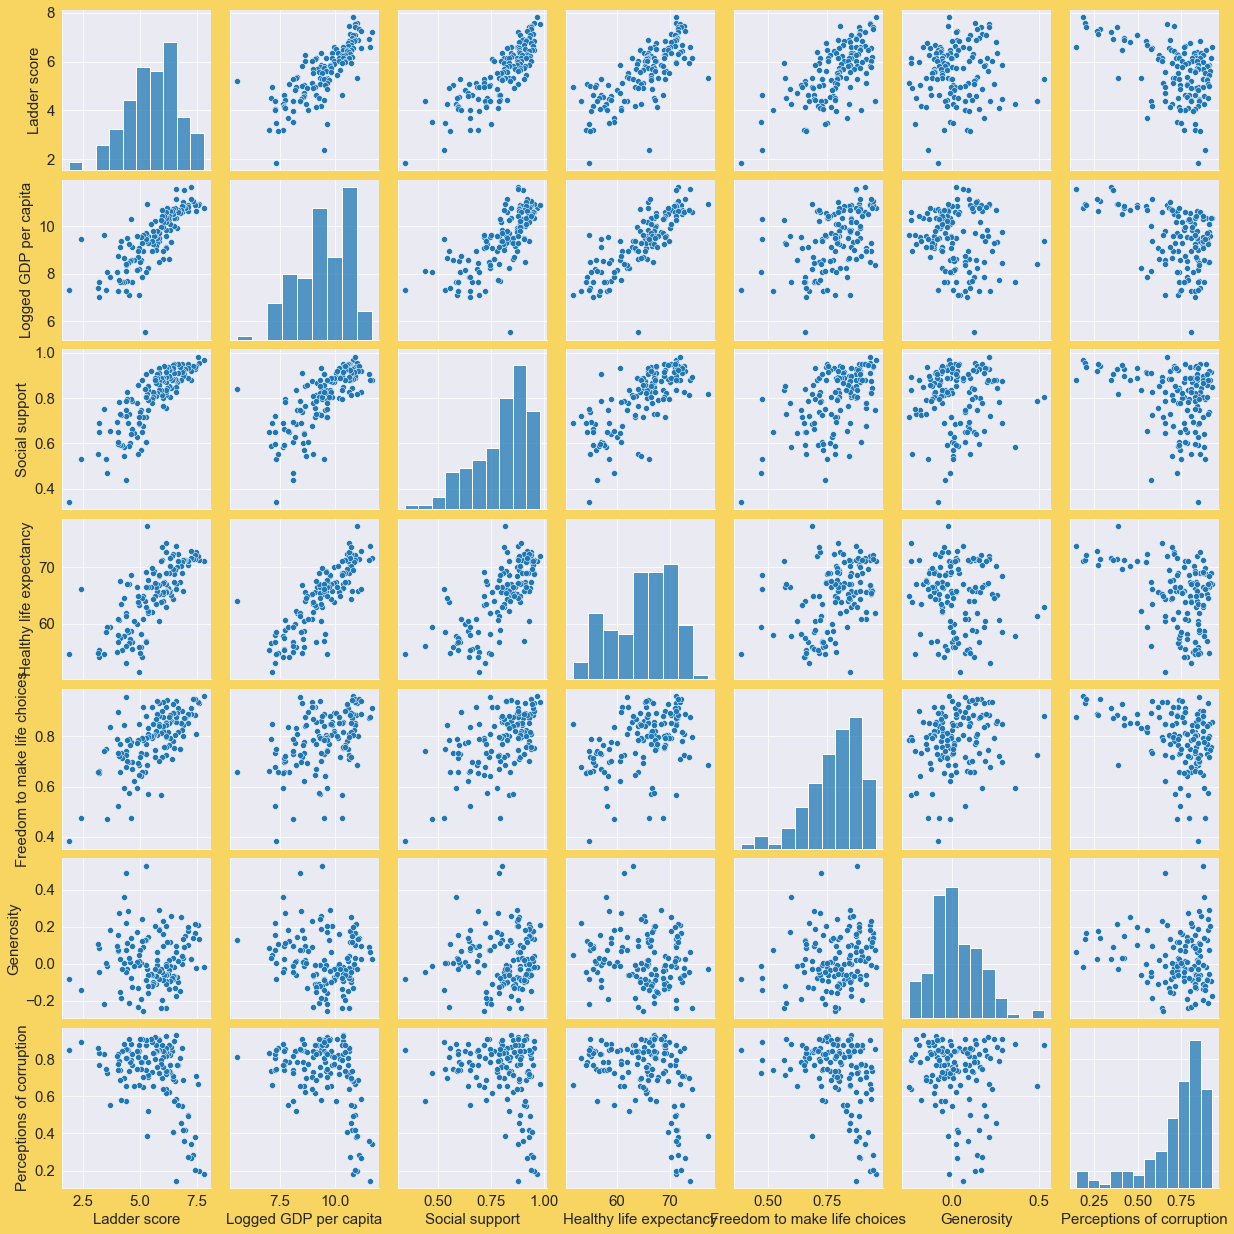

In [20]:
sns.pairplot(data)

Text(0, 0.5, 'Happiness score')

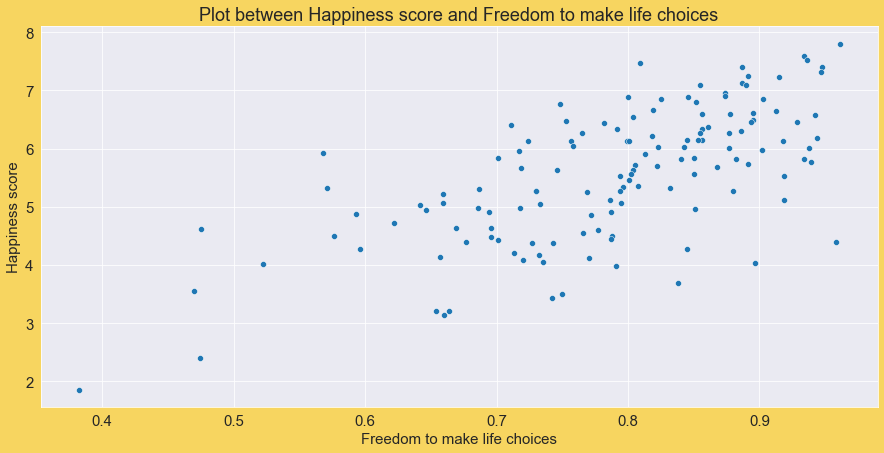

In [21]:
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Happiness score and Freedom to make life choices')
sns.scatterplot(x=data['Freedom to make life choices'],y=data['Ladder score'])
plt.ylabel('Happiness score')


Text(0, 0.5, 'Coruption')

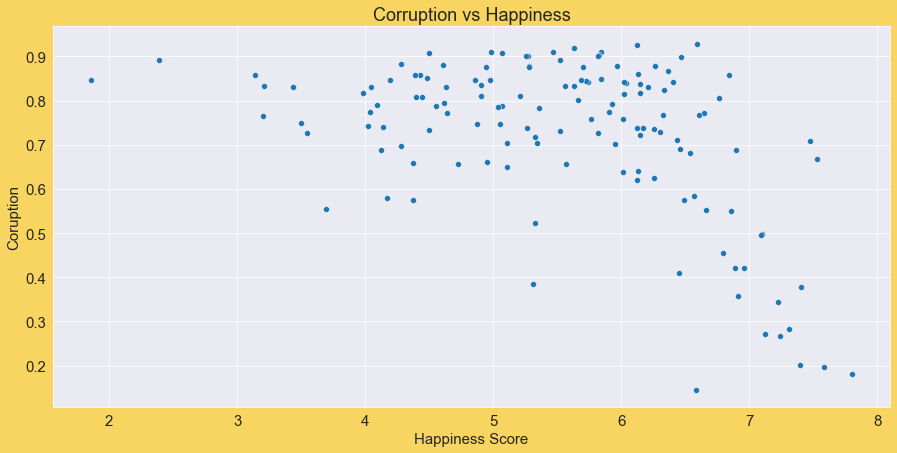

In [22]:
#corruption vs happiness
plt.rcParams['figure.figsize']=(15,7)
plt.title('Corruption vs Happiness')
sns.scatterplot(x=data['Ladder score'],y= data['Perceptions of corruption'])
plt.xlabel('Happiness Score')
plt.ylabel('Coruption')

##### Hierarchical Clustering

In [23]:
data_no = data.drop(['Country name'],axis=1)

In [24]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data_no)
data_scaled = pd.DataFrame(data_scaled, columns=data_no.columns)
datasc=data_scaled.copy()
data_scaled.head()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.107792,0.149063,0.013384,0.982751,0.013274,-0.000262,0.002514
1,0.104636,0.151202,0.013159,0.982771,0.012883,0.001848,0.002703
2,0.102766,0.148704,0.013416,0.983307,0.012774,0.002880,0.009117
3,0.101172,0.144034,0.012767,0.984197,0.010953,-0.000311,0.009585
4,0.101729,0.150360,0.012780,0.983207,0.012189,0.002927,0.005208


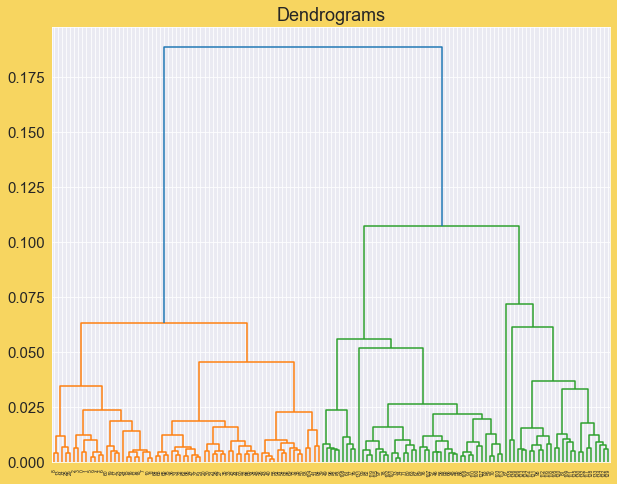

In [25]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [26]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

->0 belongs to cluster 1

->1 belings to clustre 2

C:\Users\user\AppData\Local\Temp\ipykernel_20396\2152128354.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


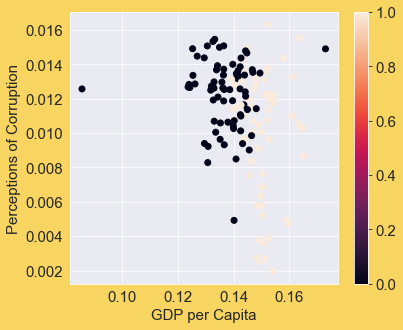

In [27]:
plt.figure(figsize=(6, 5))  
plt.scatter(data_scaled['Logged GDP per capita'], data_scaled['Perceptions of corruption'], c=cluster.labels_) 
plt.xlabel('GDP per Capita')
plt.ylabel('Perceptions of Corruption')
plt.colorbar()

##### K-Means Clustering 

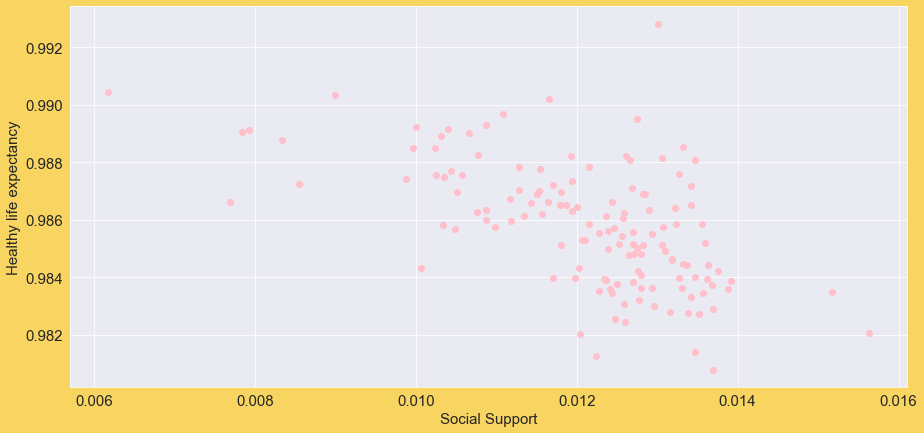

In [28]:
X = data_scaled[["Social support","Healthy life expectancy"]]
plt.scatter(x=X["Social support"],y=X["Healthy life expectancy"],c='pink')
plt.xlabel("Social Support")
plt.ylabel("Healthy life expectancy")
plt.show()

[[0.01209522 0.98647781]
 [0.0130542  0.98368069]
 [0.0099465  0.98884934]]


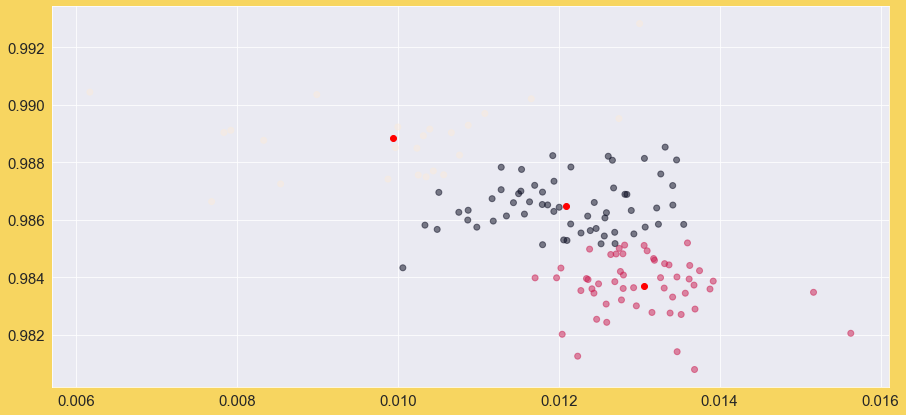

In [29]:
#Performing K MEANS CLUSTERING with 3 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Social support'], X['Healthy life expectancy'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()